<a href="https://colab.research.google.com/github/martinpius/Computer-Vission/blob/main/CNN_mnist_training_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n...please load your drive...")
def time_fmt(t:float = 123.8176)->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"
print(f"...testing...testing....testing\nexecution time: {time_fmt()}")

Mounted at /content/drive/
You are using colab with tensorflow version: 2.4.1
...testing...testing....testing
execution time: 0: 002: 03.00


In [72]:
#Training a simple CNN for the mnist images from scratch:
import tensorflow as tf
import pandas as pd
import numpy as np
import time, random
import tensorflow.keras.backend as K
from io import BytesIO
from matplotlib.pyplot import imshow
from IPython import display
import matplotlib.pyplot as plt
pd.set_option('max_rows', 5)
pd.set_option('max_columns', 15)
%matplotlib inline
plt.style.use('fivethirtyeight')


In [3]:
#Lading the mnist dataset from keras:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [28]:
print(f"x_train_shape: {x_train.shape}, y_train_shape: {y_train.shape}\nx_test_shape: {x_test.shape}, y_test_shape: {y_test.shape}")

x_train_shape: (60000, 28, 28, 1), y_train_shape: (60000, 10)
x_test_shape: (10000, 28, 28, 1), y_test_shape: (10000, 10)


In [5]:
#displays some images sample from training dataset:


time elapse is : 0: 006: 04.00


<Figure size 432x288 with 0 Axes>

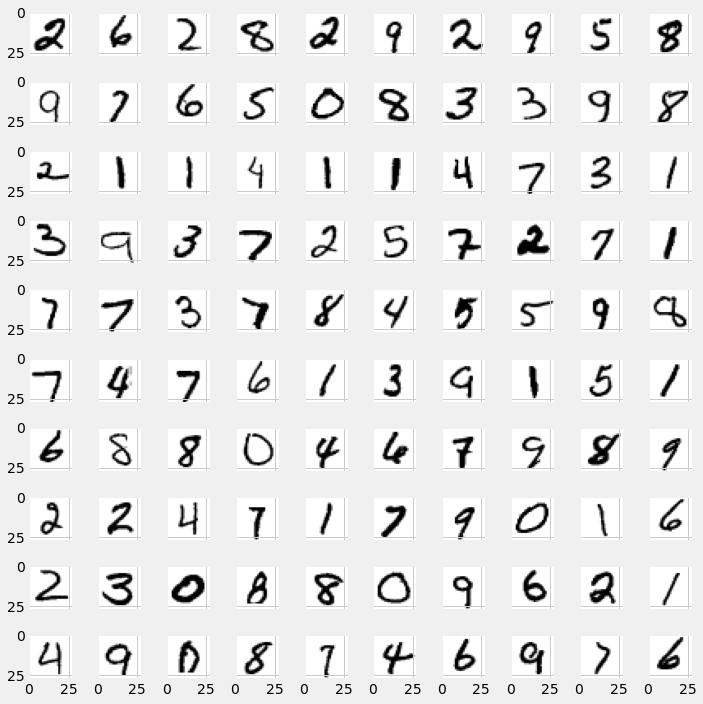

In [7]:
tic = time.time()
rows = 10
rand_indices = random.sample(range(x_train.shape[0]), rows * rows)
sample_images = x_train[rand_indices,:]
plt.clf()
#set the graph
fig, axes = plt.subplots(rows,rows,
                        figsize = (rows ,  rows),
                        sharex = True, sharey = True)

#ploting the images
for img in range(rows * rows):
  subplot_row = img//rows
  subplot_col = img % rows
  ax = axes[subplot_row, subplot_col]
  plt_imgs = np.reshape(sample_images[img,:], (28,28))
  ax.imshow(plt_imgs, cmap = 'gray_r')
  ax.set_xbound([0, 28])
  plt.tight_layout()

print(f"\ntime elapse is : {time_fmt(time.time() - tic)}")




In [80]:
#Processing the data:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"{x_train.shape}, {y_train.shape}\n{x_test.shape},{y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28),(10000,)


In [81]:
batch_size = 64
num_classes = 10
epochs = 12
# input image dimensions
h, w = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, h, w)
    x_test = x_test.reshape(x_test.shape[0], 1, h, w)
    input_shape = (1, h, w)
else:
    x_train = x_train.reshape(x_train.shape[0], h, w, 1)
    x_test = x_test.reshape(x_test.shape[0],h, w, 1)
    input_shape = (h, w, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes=10), tf.keras.utils.to_categorical(y_test, num_classes=10)

In [82]:
print(f"{x_train.shape}, {x_test.shape},{y_train.shape},{y_test.shape}")


(60000, 28, 28, 1), (10000, 28, 28, 1),(60000, 10),(10000, 10)


Model: "mnist_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_img (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
drop_out (Dropout)           (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
fc (Dense)                   (None, 128)               16

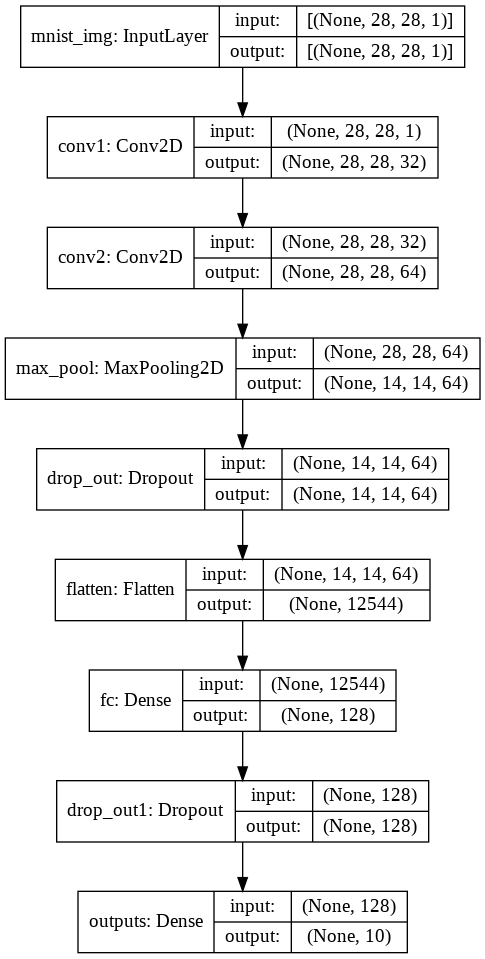

In [91]:
#Building the model:
inputs = tf.keras.Input(shape = input_shape, name = 'mnist_img')
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), 
                           padding = 'same', strides = (1,1), 
                           kernel_initializer = 'random_normal', 
                           activation = 'relu', name = 'conv1')(inputs)

x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), 
                           padding = 'same', strides = (1,1), 
                           kernel_initializer = 'random_normal', 
                           activation = 'relu', name = 'conv2')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = 'max_pool')(x)
x = tf.keras.layers.Dropout(rate = 0.25, name = 'drop_out')(x)
x = tf.keras.layers.Flatten(name = 'flatten')(x)
x = tf.keras.layers.Dense(units = 128, kernel_initializer = 'random_normal', activation = 'relu',
                          name = 'fc')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'drop_out1')(x)
outputs = tf.keras.layers.Dense(units = 10, activation = 'relu', name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_cnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mnist_cnn.png', show_shapes = True)




In [92]:
tic = time.time()
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, verbose = 2, batch_size= 64)
toc = time.time()
print(f"\nTime elapse is: {time_fmt(toc - tic)}")

Epoch 1/30
938/938 - 5s - loss: nan - accuracy: 0.8401 - val_loss: nan - val_accuracy: 0.9570
Epoch 2/30
938/938 - 5s - loss: nan - accuracy: 0.9040 - val_loss: nan - val_accuracy: 0.9587
Epoch 3/30
938/938 - 5s - loss: nan - accuracy: 0.9051 - val_loss: nan - val_accuracy: 0.9614
Epoch 4/30
938/938 - 5s - loss: nan - accuracy: 0.9337 - val_loss: nan - val_accuracy: 0.9697
Epoch 5/30
938/938 - 5s - loss: nan - accuracy: 0.9434 - val_loss: nan - val_accuracy: 0.9716
Epoch 6/30
938/938 - 5s - loss: nan - accuracy: 0.9385 - val_loss: nan - val_accuracy: 0.9657
Epoch 7/30
938/938 - 4s - loss: nan - accuracy: 0.9295 - val_loss: nan - val_accuracy: 0.9661
Epoch 8/30
938/938 - 4s - loss: nan - accuracy: 0.9491 - val_loss: nan - val_accuracy: 0.9751
Epoch 9/30
938/938 - 5s - loss: nan - accuracy: 0.9473 - val_loss: nan - val_accuracy: 0.9747
Epoch 10/30
938/938 - 5s - loss: nan - accuracy: 0.9540 - val_loss: nan - val_accuracy: 0.9773
Epoch 11/30
938/938 - 4s - loss: nan - accuracy: 0.9606 - v